In [2]:
import numpy as np
import pandas as pd

# be sure to change the file path
# if you have the dataset in another
# directly than the working folder
df = pd.read_csv('/content/WineQT.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [4]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df =  (val_df- min_val)/range

In [5]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape

[12]

In [6]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

              # MAE error is good for
              # numerical predictions
              loss='mae')

In [9]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.3229 - val_loss: 0.2028
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1825 - val_loss: 0.1326
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1319 - val_loss: 0.1510
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1582 - val_loss: 0.1384
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1362 - val_loss: 0.1220
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1240 - val_loss: 0.1269
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1259 - val_loss: 0.1252
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1230 - val_loss: 0.1166
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1146 - val_loss: 0.1109
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1133 - val_loss: 0.1089
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1093 - val_loss: 0.1074
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1060 - val_loss: 0.1103
E

In [10]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[0.43644035],
       [0.43695736],
       [0.35848516]], dtype=float32)

In [11]:
y_val.iloc[0:3]

,quality
0,0.4
5,0.4
9,0.4


<Axes: >

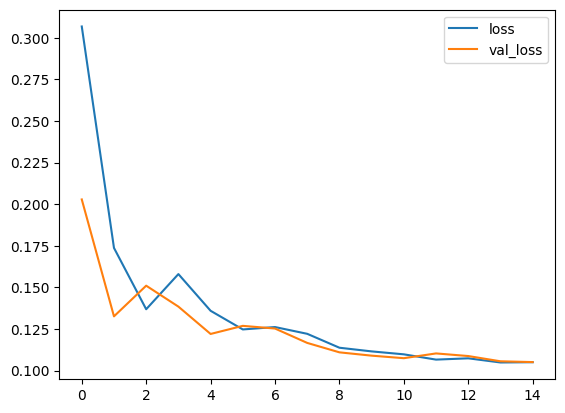

In [12]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()